### Example plots from TRACK output

This notebook contains plots of TRACK output files for the purpose of presenting a basic visualisation of the output and how it might be used. 

In these examples, TRACK output of ACCESS-ESM1.5 psl (pressure sea level) data from 2010 was used.
Tracks and cyclogenesis points on the Northern and Southern Hemisphere are plotted on polar stereographic projections and a heatmap of tracks is plotted on cylindrical projection.

Points close to the equator are ignored in this case because NH and SH are tracked separately on polar projections and the equator is treated as a boundary, producing spurious tracks.

In [2]:
from netCDF4 import Dataset
import numpy as np

# Read the data
NH = 'ff_trs_neg_psl_ACCESS_2010_NH.nc'
SH = 'ff_trs_neg_psl_ACCESS_2010_SH.nc'
dataset_NH = Dataset(NH, 'r')
dataset_SH = Dataset(SH, 'r')

In [3]:
# Get variables from dataset
lons_NH = dataset_NH.variables['longitude'][:]
lats_NH = dataset_NH.variables['latitude'][:]
first_pts_NH = dataset_NH.variables['FIRST_PT'][:]
track_id_NH = dataset_NH.variables['TRACK_ID'][:]

lons_SH = dataset_SH.variables['longitude'][:]
lats_SH = dataset_SH.variables['latitude'][:]
first_pts_SH = dataset_SH.variables['FIRST_PT'][:]
track_id_SH = dataset_SH.variables['TRACK_ID'][:]

# Append SH data to NH data
track_id_SH += track_id_NH[-1] + 1
first_pts_SH += len(lons_NH)
lons = np.append(lons_NH, lons_SH)
lats = np.append(lats_NH, lats_SH)
first_pts = np.append(first_pts_NH, first_pts_SH)
track_id = np.append(track_id_NH, track_id_SH)

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap, shiftgrid
from mpl_toolkits.basemap import addcyclic

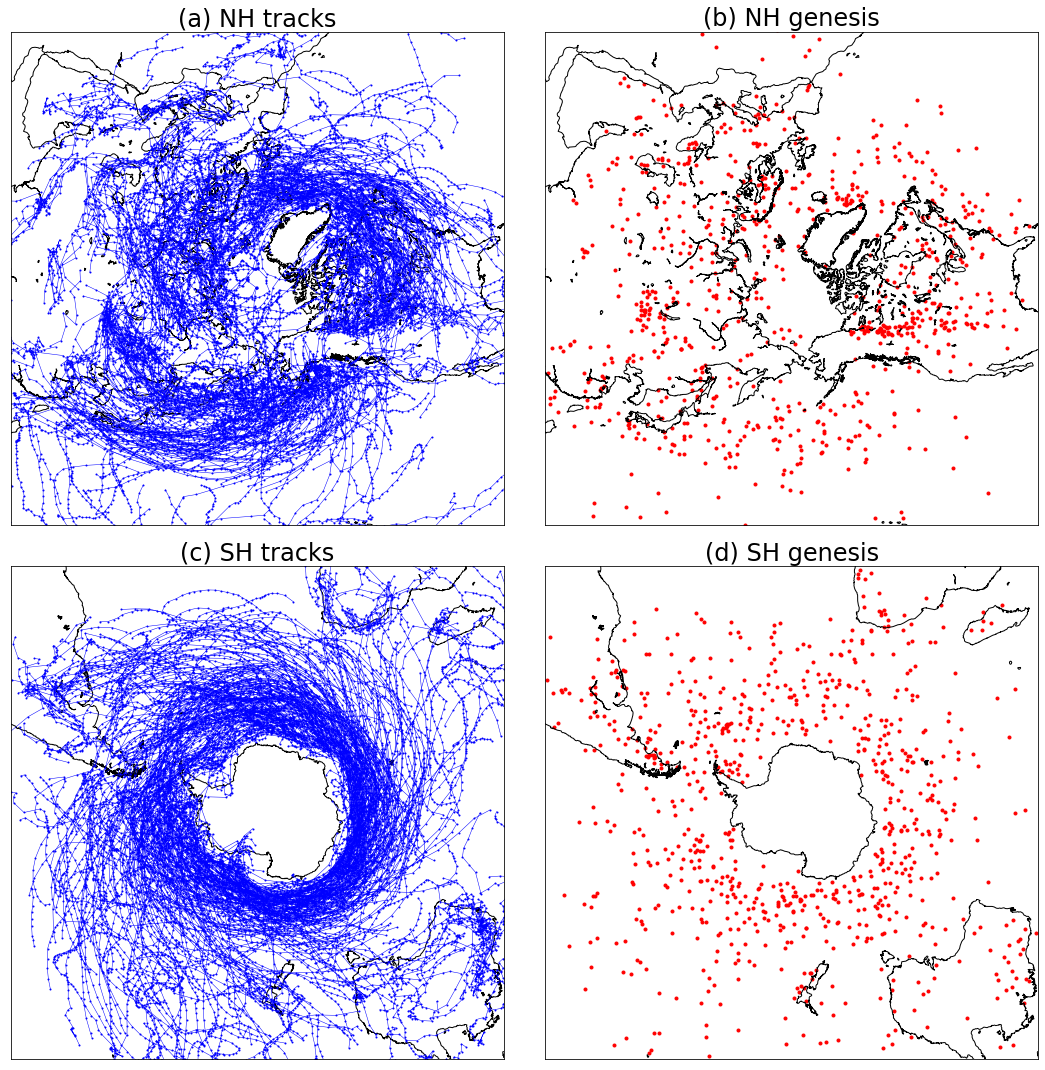

In [20]:
%matplotlib inline

# 4 subplots
fig1, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2)
fig1.set_figwidth(15)
fig1.set_figheight(15)
fig1.tight_layout()

m = Basemap(projection='npstere',boundinglat=25,lon_0=180,resolution='l', ax=ax1)
m2 = Basemap(projection='npstere',boundinglat=25,lon_0=180,resolution='l', ax=ax2)
m3 = Basemap(projection='spstere',boundinglat=-25,lon_0=180,resolution='l', ax=ax3)
m4 = Basemap(projection='spstere',boundinglat=-25,lon_0=180,resolution='l', ax=ax4)

m.drawcoastlines()
m2.drawcoastlines()
m3.drawcoastlines()
m4.drawcoastlines()

ax1.set_title('(a) NH tracks', size=24)
ax2.set_title('(b) NH genesis', size=24)
ax3.set_title('(c) SH tracks', size=24)
ax4.set_title('(d) SH genesis', size=24)

# NH
for track in track_id[0:981]:
    # Trajectories
    lat = lats[first_pts[track]:first_pts[track+1]]
    lon = lons[first_pts[track]:first_pts[track+1]]

    # Genesis points
    start_lat = lats[first_pts[track]]
    start_lon = lons[first_pts[track]]

    x, y = m(lon, lat)
    x_start, y_start = m(start_lon, start_lat)
    if abs(lat[0]) >= 0.7: # ignore points close to equator
        m.plot(x, y, linewidth=0.5, marker='.', ms="2.0", color='b',ax=ax1) # this plots trajectories
        #m.scatter(x, y, marker='.', ax=ax1) # color='g',
        m.scatter(x_start, y_start, marker='.', color='r', ax=ax2)

# SH
for track in track_id[981:-1]:
    # Trajectories
    lat = lats[first_pts[track]:first_pts[track+1]]
    lon = lons[first_pts[track]:first_pts[track+1]]

    # Genesis points
    start_lat = lats[first_pts[track]]
    start_lon = lons[first_pts[track]]

    x, y = m3(lon, lat)
    x_start, y_start = m4(start_lon, start_lat)
    if abs(lat[0]) >= 0.7: # ignore points close to equator
        m3.plot(x, y, linewidth=0.5, marker='.', ms="2.0", color='b',ax=ax3) # this plots trajectories
        #m3.scatter(x, y, marker='.', ax=ax3) # color='g',
        m4.scatter(x_start, y_start, marker='.', color='r', ax=ax4)

plt.show()

In [5]:
from matplotlib import cm as cmap

<Figure size 432x288 with 0 Axes>

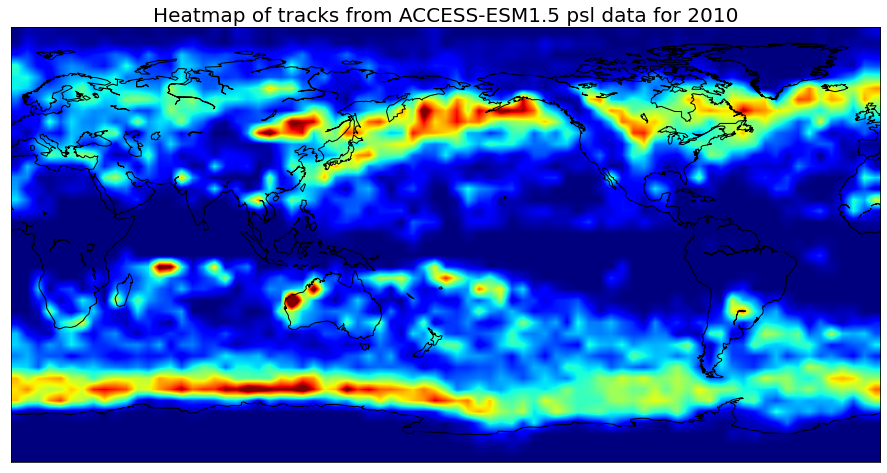

In [7]:
%matplotlib inline

fig1 = plt.figure()
plt.figure(figsize=(20,8))
m = Basemap(projection='cyl', lon_0=180)
m.drawcoastlines()

# Ignore points close to equator
xs, ys = m(lons[np.where(abs(lats) >= 0.7)[0]], (lats[np.where(abs(lats) >= 0.7)[0]] + 90)/2)

xedges = np.linspace(0, 360, 80)
yedges = np.linspace(0, 90, 40)

heatmap, xedges, yedges = np.histogram2d(xs, ys, bins=(xedges, yedges))

m.imshow(heatmap.T, interpolation='bilinear', cmap=cmap.jet, vmax=60)
plt.title("Heatmap of tracks from ACCESS-ESM1.5 psl data for 2010", fontdict = {'fontsize' : 20})
plt.show()
